Runtime = 20.012385606765747


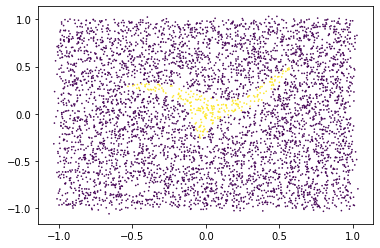

Classification error 0.1264 on validation set, epoch 50


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import opynn as opy
import time

# Load training data
train_data = np.genfromtxt('./data/training_set.csv', delimiter = ',')
train_targets = train_data[:,2]
train_data = train_data[:,0:2]

# Load test data
test_data = np.genfromtxt('./data/validation_set.csv', delimiter = ',')
test_targets = test_data[:, 2]
test_data = test_data[:, 0:2]

# Set parameters
n_train = np.shape(train_targets)[0]
n_test = np.shape(test_targets)[0]
train_rate = 0.02
hidden_layer_1_size = 8
hidden_layer_2_size = 6
batch_size = 64
n_epoch = 50

# Create network layers
layer1 = opy.FullyConnectedLayer(2, hidden_layer_1_size, 'tanh')
layer2 = opy.FullyConnectedLayer(hidden_layer_1_size, hidden_layer_2_size, 'tanh')
output_layer = opy.FullyConnectedLayer(hidden_layer_2_size, 1, 'tanh')

# Create network object
net = [layer1, layer2, output_layer]
my_network = opy.NeuralNetwork(net)

# Train network
runtime = time.time()
for i_epoch in range(n_epoch):
    data = opy.create_data_batches(train_data, train_targets, batch_size)
    opy.mini_batch_gradient_descent(my_network, data, train_rate)
print("Runtime =", time.time() - runtime)

output = np.zeros(n_test)
for i in range(n_test):
    output[i] = my_network.output(test_data[i,:])

# Plot test data and classification results
plt.scatter(test_data[:,0],test_data[:,1], 0.4, c = np.sign(output))
plt.show()

classification_error = 1/(2*n_test) * np.sum( np.abs( np.sign(output) - test_targets ) )
print('Classification error',classification_error,'on validation set, epoch', n_epoch)